# Covid19

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
region = pd.read_csv('./coronavirusdataset/Region.csv')
timeprovince = pd.read_csv('./coronavirusdataset/TimeProvince.csv')
timegender = pd.read_csv('./coronavirusdataset/TimeGender.csv')
timeage = pd.read_csv('./coronavirusdataset/TimeAge.csv')
time = pd.read_csv('./coronavirusdataset/Time.csv')
case = pd.read_csv('./coronavirusdataset/Case.csv')

## Case

In [3]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006


In [4]:
df_province = case.groupby('province')['confirmed'].sum().reset_index()

In [5]:
df_confirmed = case.groupby('infection_case')['confirmed'].sum().reset_index()

In [6]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

In [7]:
df_confirmed = df_confirmed.sort_values('confirmed')
fig = px.bar(
    data_frame = df_confirmed,
    x = df_confirmed['confirmed'][-10:],
    y = df_confirmed['infection_case'][-10:],
    color = df_confirmed['infection_case'][-10:],
    title = 'Infection Case Top 10',
    orientation = 'h'
)
fig.show()

In [8]:
fig = px.pie(
    data_frame = df_confirmed,
    values = df_confirmed['confirmed'][-10:],
    names = df_confirmed['infection_case'][-10:],
    color = df_confirmed['infection_case'][-10:],
    title = 'Infection Case Top 10',
    template = 'seaborn',
)
fig.update_traces(rotation = 90, pull = 0.05)
fig.show()

In [9]:
df_province

,province,confirmed
0,Busan,91
1,Chungcheongbuk-do,31
2,Chungcheongnam-do,115
3,Daegu,6066
4,Daejeon,22
5,Gangwon-do,29
6,Gwangju,16
7,Gyeonggi-do,164
8,Gyeongsangbuk-do,1145
9,Gyeongsangnam-do,85


In [10]:
cond = region['city'].apply(lambda x : x in region['province'].unique())
df_coordinate = region.loc[cond, ['province', 'latitude', 'longitude']]

In [11]:
center = {
    'lat' : df_coordinate.loc[df_coordinate['province'] == 'Korea', 'latitude'].values[0],
    'lon' : df_coordinate.loc[df_coordinate['province'] == 'Korea', 'longitude'].values[0]
}
center

{'lat': 37.566953000000005, 'lon': 126.977977}

In [12]:
df_merge = pd.merge(df_province, df_coordinate, how = 'left')

In [13]:
df_merge

,province,confirmed,latitude,longitude
0,Busan,91,35.179884,129.074796
1,Chungcheongbuk-do,31,36.635680,127.491384
2,Chungcheongnam-do,115,36.658976,126.673318
3,Daegu,6066,35.872150,128.601783
4,Daejeon,22,36.350621,127.384744
5,Gangwon-do,29,37.885369,127.729868
6,Gwangju,16,35.160467,126.851392
7,Gyeonggi-do,164,37.275119,127.009466
8,Gyeongsangbuk-do,1145,36.576032,128.505599
9,Gyeongsangnam-do,85,35.238294,128.692397


In [14]:
fig = px.scatter_mapbox(
    data_frame = df_merge,
    lat = 'latitude',
    lon = 'longitude',
    color = 'province',
    size = 'confirmed',
    hover_name = 'province',
    zoom = 5,
    height = 500,
    center = center
)
fig.update_layout(mapbox_style = "carto-positron")
fig.show()

In [15]:
import folium
lats = [lat for lat in df_merge['latitude'].values]
lons = [lon for lon in df_merge['longitude'].values]

Map = folium.Map(location = [center['lat'], center['lon']], zoom_start = 7)

for i in range(len(lats)):
    folium.CircleMarker(
        location  = [lats[i], lons[i]],
        radius = 0.01 * df_merge['confirmed'].iloc[i],
        color = 'red',
        fill_color = 'red',
        fill_opaciy = 0.5,
        popup = (str(df_merge.loc[i, 'province']) + ':' + str(df_merge.loc[i, 'confirmed']))
    ).add_to(Map)
Map

## Time
### Time

In [16]:
df_time = time.copy()
df_time.drop('time', axis = 1, inplace = True)

In [17]:
df = df_time.copy()
df['loc'] = 'KOR'
df['hover_name'] = 'Korea, Rep.'

fig = px.scatter_geo(df, locations = 'loc', color = 'hover_name',
                     hover_name = 'hover_name', size = 'confirmed',
                     animation_frame = 'date',
                     projection = 'natural earth')
fig.show()

In [18]:
fig = px.scatter_geo(df, locations = 'loc', color = 'hover_name',
                     hover_name = 'hover_name', size = 'released',
                     animation_frame = 'date',
                     projection = 'natural earth')
fig.show()

In [19]:
fig = px.scatter_geo(df, locations = 'loc', color = 'hover_name',
                     hover_name = 'hover_name', size = 'released',
                     animation_frame = 'date',
                     projection = 'natural earth')
fig.show()

In [20]:
fig = px.scatter_geo(df, locations = 'loc', color = 'hover_name',
                     hover_name = 'hover_name', size = 'deceased',
                     animation_frame = 'date',
                     projection = 'natural earth')
fig.show()

In [21]:
fig = px.scatter_geo(df, locations = 'loc', color = 'hover_name',
                     hover_name = 'hover_name', size = 'test',
                     animation_frame = 'date',
                     projection = 'natural earth')
fig.show()

In [22]:
fig = px.scatter_geo(df, locations = 'loc', color = 'hover_name',
                     hover_name = 'hover_name', size = 'negative',
                     animation_frame = 'date',
                     projection = 'natural earth')
fig.show()

In [23]:
fig = px.scatter_geo(df, locations = 'loc', color = 'hover_name',
                     hover_name = 'hover_name', size = 'deceased',
                     animation_frame = 'date',
                     projection = 'orthographic')
fig.show()

In [24]:
import pyecharts.charts as pe
from pyecharts import options as opts
df_time['date'] = df_time['date'].str.extract('-+(\d{2}-\d{2})')

date = [d for d in df_time['date']]
test = [t for t in df_time['test']]
neg = [n for n in df_time['negative']]
con = [c for c in df_time['confirmed']]
rel = [r for r in df_time['released']]
dec = [d for d in df_time['deceased']]

line = pe.Line(init_opts = opts.InitOpts(width = '970px', height = '600px'))
line.set_global_opts(title_opts = opts.TitleOpts(title = 'Covid19 누적 숫자'))
line.add_xaxis(date)
line.add_yaxis('Test', test, itemstyle_opts = {'color':"#ff0000"})
line.add_yaxis('Negative', neg, itemstyle_opts = {'color':"#0046f9"})
line.add_yaxis('Confirmed', con, itemstyle_opts = {'color':"#000000"})
line.add_yaxis('Released', rel, itemstyle_opts = {'color':"#ed7855"})
line.add_yaxis('Deceased', dec, itemstyle_opts = {'color':"#f2da54"})
line.set_series_opts(label_opts = {'is_show' : True}, linestyle_opts = {'width' : 1.5}, symbol = 'circle')
line.render_notebook()

In [25]:
df_time = time.copy()
df_time['isolated'] = df_time['test'] - df_time[['negative', 'confirmed', 'released', 'deceased']].sum(axis = 1)

In [26]:
df_per = df_time[['negative', 'confirmed', 'released', 'deceased', 'isolated']].apply(lambda x : x / df_time['test'])
cols = df_per.columns
df_per['date'] = df_time['date']

In [27]:
import plotly.graph_objects as go
x = df_per['date']
fig = go.Figure(
    data = [
        go.Bar()
    ]
)
for i in cols:
    fig.add_trace(
        go.Bar(name = i, x = x, y = df_per[i])
    )
fig.update_layout(barmode = 'stack')
fig.show()

In [28]:
df_time = time.copy()
df_time['date'] = pd.to_datetime(df_time['date'])
df_time = df_time.set_index('date')

C:\Users\Ho\Anaconda3\lib\site-packages\calmap\__init__.py:221: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



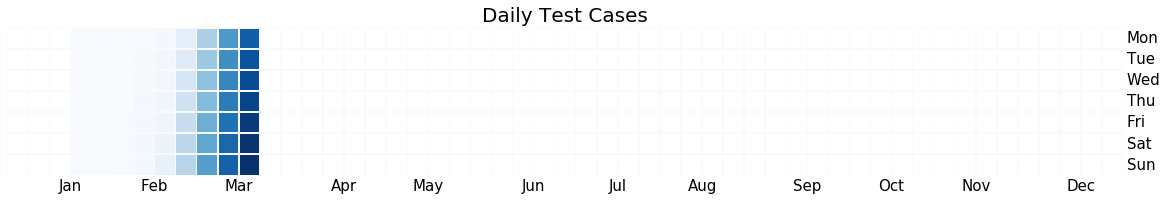

In [29]:
import calmap
plt.subplots(figsize = (20, 10))
calmap.yearplot(df_time['test'], fillcolor = 'white', cmap = 'Blues', linewidth = 0.5, linecolor = "#fafafa", year = 2020)
plt.title("Daily Test Cases",fontsize = 20)
plt.tick_params(labelsize = 15)

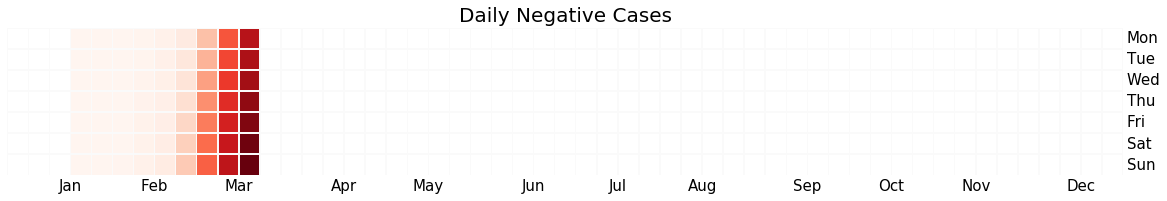

In [30]:
plt.subplots(figsize = (20, 10))
calmap.yearplot(df_time['negative'], fillcolor = 'white', cmap = 'Reds', linewidth = 0.5, linecolor = "#fafafa", year = 2020)
plt.title("Daily Negative Cases",fontsize = 20)
plt.tick_params(labelsize = 15)

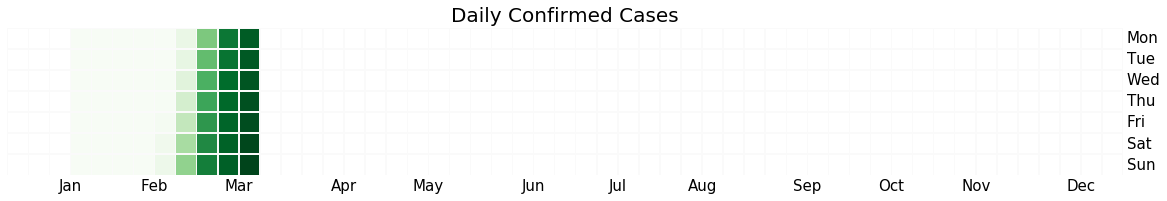

In [31]:
plt.subplots(figsize = (20, 10))
calmap.yearplot(df_time['confirmed'], fillcolor = 'white', cmap = 'Greens', linewidth = 0.5, linecolor = "#fafafa", year = 2020)
plt.title("Daily Confirmed Cases",fontsize = 20)
plt.tick_params(labelsize = 15)

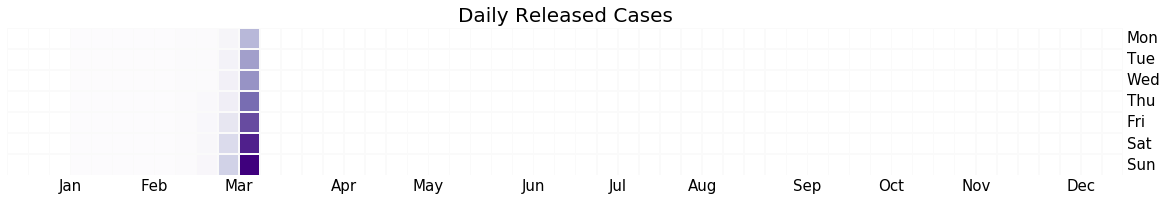

In [32]:
plt.subplots(figsize = (20, 10))
calmap.yearplot(df_time['released'], fillcolor = 'white', cmap = 'Purples', linewidth = 0.5, linecolor = "#fafafa", year = 2020)
plt.title("Daily Released Cases",fontsize = 20)
plt.tick_params(labelsize = 15)

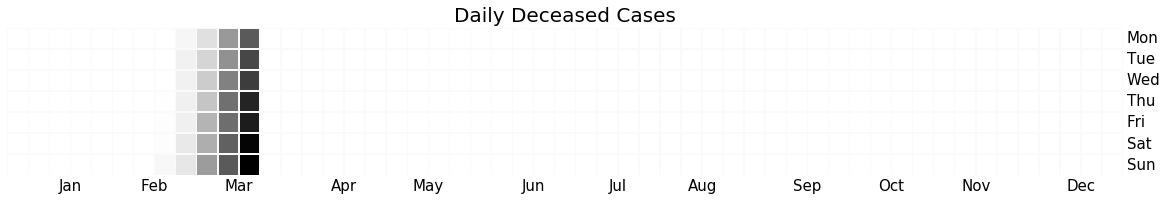

In [33]:
plt.subplots(figsize = (20, 10))
calmap.yearplot(df_time['deceased'], fillcolor = 'white', cmap = 'Greys', linewidth = 0.5, linecolor = "#fafafa", year = 2020)
plt.title("Daily Deceased Cases",fontsize = 20)
plt.tick_params(labelsize = 15)

### Timeage

In [34]:
df_timeage = timeage.copy()
df_timeage['date'] = df_timeage['date'].str.extract('-+(\d{2}-\d{2})')
age_group = [age for age in df_timeage['age'].unique()]

In [35]:
def make_var(i):
    v1 = [c for c in df_timeage.loc[df_timeage['age'] == i, 'confirmed']]
    v2 = [d for d in df_timeage.loc[df_timeage['age'] == i, 'deceased']]
    return v1, v2

In [36]:
confirmed_0s, deceased_0s = make_var('0s')
confirmed_10s, deceased_10s = make_var('10s')
confirmed_20s, deceased_20s = make_var('20s')
confirmed_30s, deceased_30s = make_var('30s')
confirmed_40s, deceased_40s = make_var('40s')
confirmed_50s, deceased_50s = make_var('50s')
confirmed_60s, deceased_60s = make_var('60s')
confirmed_70s, deceased_70s = make_var('70s')
confirmed_80s, deceased_80s = make_var('80s')

In [37]:
from pyecharts.globals import ThemeType

def make_pyecharts(var1, var2, var3):
    line = pe.Line(init_opts = opts.InitOpts(width = '970px', height = '600px', theme = ThemeType.LIGHT))
    line.add_xaxis(var1)
    line.add_yaxis('Confirmed', var2)
    line.add_yaxis('Deceased', var3)
    line.set_series_opts(label_opts = {'is_show' : True}, linestyle_opts = {'width' : 1.5}, symbol = 'circle')

    return line

In [38]:
line0 = make_pyecharts(age_group, confirmed_0s, deceased_0s)
line1 = make_pyecharts(age_group, confirmed_10s, deceased_10s)
line2 = make_pyecharts(age_group, confirmed_20s, deceased_20s)
line3 = make_pyecharts(age_group, confirmed_30s, deceased_30s)
line4 = make_pyecharts(age_group, confirmed_40s, deceased_40s)
line5 = make_pyecharts(age_group, confirmed_50s, deceased_50s)
line6 = make_pyecharts(age_group, confirmed_60s, deceased_60s)
line7 = make_pyecharts(age_group, confirmed_70s, deceased_70s)
line8 = make_pyecharts(age_group, confirmed_80s, deceased_80s)

line0.set_global_opts(title_opts = opts.TitleOpts(title = '연령대 별 확진자 및 사망자 수', subtitle = '(명)'))

timeline = pe.Timeline(init_opts = opts.InitOpts(width = '1500px', height = '600px'))
timeline.add_schema(is_auto_play = False)
timeline.add(line0, '10대 미만'); timeline.add(line1, '10대'); timeline.add(line2, '20대')
timeline.add(line3, '30대'); timeline.add(line4, '40대'); timeline.add(line5, '50대')
timeline.add(line6, '60대'); timeline.add(line7, '70대'); timeline.add(line8, '80대')
timeline.render_notebook()

### Timeprovince

In [39]:
df_timeprovince = timeprovince.copy()
df_timeprovince.drop('time', axis = 1, inplace = True)

In [40]:
def values(var):
    v1 = [v for v in df_timeprovince.loc[df_timeprovince['province'] == var, 'confirmed']]
    v2 = [v for v in df_timeprovince.loc[df_timeprovince['province'] == var, 'released']]
    v3 = [v for v in df_timeprovince.loc[df_timeprovince['province'] == var, 'deceased']]

    return v1, v2, v3

In [41]:
date = [d for d in df_timeprovince.loc[df_timeprovince['province'] == 'Seoul', 'date']]

sl1, sl2, sl3 = values('Seoul')
bs1, bs2, bs3 = values('Busan')
dg1, dg2, dg3 = values('Daegu')
ic1, ic2, ic3 = values('Incheon')
gj1, gj2, gj3 = values('Gwangju')
dj1, dj2, dj3 = values('Daejeon')
us1, us2, us3 = values('Ulsan')
sj1, sj2, sj3 = values('Sejong')
gg1, gg2, gg3 = values('Gyeonggi-do')
gw1, gw2, gw3 = values('Gangwon-do')
cb1, cb2, cb3 = values('Chungcheongbuk-do')
cn1, cn2, cn3 = values('Chungcheongnam-do')
jb1, jb2, jb3 = values('Jeollabuk-do')
jn1, jn2, jn3 = values('Jeollanam-do')
gb1, gb2, gb3 = values('Gyeongsangbuk-do')
gn1, gn2, gn3 = values('Gyeongsangnam-do')
jj1, jj2, jj3 = values('Jeju-do')

In [42]:
def make_pyecharts(var1, var2, var3, var4):
    line = pe.Line(init_opts = opts.InitOpts(width = '970px', height = '600px', theme = ThemeType.LIGHT))
    line.add_xaxis(var1)
    line.add_yaxis('Confirmed', var2)
    line.add_yaxis('Released', var3)
    line.add_yaxis('Deceased', var4)
    line.set_series_opts(label_opts = {'is_show' : True}, linestyle_opts = {'width' : 1.5}, symbol = 'circle')

    return line

In [43]:
line1 = make_pyecharts(date, sl1, sl2, sl3)
line2 = make_pyecharts(date, bs1, bs2, bs3)
line3 = make_pyecharts(date, dg1, dg2, dg3)
line4 = make_pyecharts(date, ic1, ic2, ic3)
line5 = make_pyecharts(date, gj1, gj2, gj3)
line6 = make_pyecharts(date, dj1, dj2, dj3)
line7 = make_pyecharts(date, us1, us2, us3)
line8 = make_pyecharts(date, sj1, sj2, sj3)
line9 = make_pyecharts(date, gg1, gg2, gg3)
line10 = make_pyecharts(date, gw1, gw2, gw3)
line11 = make_pyecharts(date, cb1, cb2, cb3)
line12 = make_pyecharts(date, cn1, cn2, cn3)
line13 = make_pyecharts(date, jb1, jb2, jb3)
line14 = make_pyecharts(date, jn1, jn2, jn3 )
line15 = make_pyecharts(date, gb1, gb2, gb3)
line16 = make_pyecharts(date, gn1, gn2, gn3)
line17 = make_pyecharts(date, jj1, jj2, jj3)

In [44]:
line1.set_global_opts(title_opts = opts.TitleOpts(title = '지역 별 확진/완치/사망자 수', subtitle = '(명)'))

timeline = pe.Timeline(init_opts = opts.InitOpts(width = '1500px', height = '600px'))
timeline.add_schema(is_auto_play = False, )
timeline.add(line1, '서울'); timeline.add(line2, '부산'); timeline.add(line3, '대구')
timeline.add(line4, '인천'); timeline.add(line5, '광주'); timeline.add(line6, '대전')
timeline.add(line7, '울산'); timeline.add(line8, '세종'); timeline.add(line9, '경기도')
timeline.add(line10, '강원도'); timeline.add(line11, '충청북도'); timeline.add(line12, '충청남도')
timeline.add(line13, '전라북도'); timeline.add(line14, '전라남도'); timeline.add(line15, '경상북도')
timeline.add(line16, '경상남도'); timeline.add(line17, '제주도');
timeline.render_notebook()

In [45]:
def make_pyecharts(var1, var2, var3, var4,
                   var5, var6, var7, var8,
                   var9, var10, var11, var12,
                   var13, var14, var15, var16,
                   var17):
    line = pe.Line(init_opts = opts.InitOpts(width = '970px', height = '600px', theme = ThemeType.LIGHT))
    line.add_xaxis(date)
    line.add_yaxis('Seoul', var1)
    line.add_yaxis('Busan', var2)
    line.add_yaxis('Daegu', var3)
    line.add_yaxis('Incheon', var4)
    line.add_yaxis('Gwangju', var5)
    line.add_yaxis('Daejeon', var6)
    line.add_yaxis('Ulsan', var7)
    line.add_yaxis('Sejong', var8)
    line.add_yaxis('Gyeonggi-do', var9)
    line.add_yaxis('Gangwon-do', var10)
    line.add_yaxis('Chungcheongbuk-do', var11)
    line.add_yaxis('Chungcheongnam-do', var12)
    line.add_yaxis('Jeollabuk-do', var13)
    line.add_yaxis('Jeollanam-do', var14)
    line.add_yaxis('Gyeongsangbuk-do', var15)
    line.add_yaxis('Gyeongsangnam-do', var16)
    line.add_yaxis('Jeju-do', var17)
    line.set_series_opts(label_opts = {'is_show' : True}, linestyle_opts = {'width' : 1.5}, symbol = 'circle')

    return line

In [46]:
line1 = make_pyecharts(sl1, bs1, dg1, ic1, gj1, dj1, us1, sj1, gg1,
                       gw1, cb1, cn1, jb1, jn1, gb1, gn1, jj1)
line2 = make_pyecharts(sl2, bs2, dg2, ic2, gj2, dj2, us2, sj2, gg2,
                       gw2, cb2, cn2, jb2, jn2, gb2, gn2, jj2)
line3 = make_pyecharts(sl3, bs3, dg3, ic3, gj3, dj3, us3, sj3, gg3,
                       gw3, cb3, cn3, jb3, jn3, gb3, gn3, jj3)

timeline = pe.Timeline(init_opts = opts.InitOpts(width = '1500px', height = '600px'))
timeline.add_schema(is_auto_play = False)
timeline.add(line1, '확진'); timeline.add(line2, '완치'); timeline.add(line3, '사망')
timeline.render_notebook()

### Timegender

In [47]:
df_timegender = timegender.copy()
df_timegender['date'] = df_timegender['date'].str.extract('-+(\d{2}-\d{2})')

In [48]:
date = [d for d in df_timegender.loc[df_timegender['sex'] == 'male','date']]
confirmed_male = [c for c in df_timegender.loc[df_timegender['sex'] == 'male', 'confirmed']] 
deceased_male = [d for d in df_timegender.loc[df_timegender['sex'] == 'male', 'deceased']]

confirmed_female = [c for c in df_timegender.loc[df_timegender['sex'] == 'female', 'confirmed']]
deceased_female = [d for d in df_timegender.loc[df_timegender['sex'] == 'female', 'deceased']]

In [49]:
def make_pyecharts(var1, var2, var3):
    line = pe.Line(init_opts = opts.InitOpts(width = '970px', height = '600px', theme = ThemeType.LIGHT))
    line.add_xaxis(var1)
    line.add_yaxis('Confirmed', var2)
    line.add_yaxis('Deceased', var3)
    line.set_series_opts(label_opts = {'is_show' : True}, linestyle_opts = {'width' : 1.5}, symbol = 'circle')

    return line

In [50]:
line0 = make_pyecharts(date, confirmed_male, deceased_male)
line1 = make_pyecharts(date, confirmed_female, deceased_female)

line0.set_global_opts(title_opts = opts.TitleOpts(title = '성별 별 확진자 및 사망자 수', subtitle = '(명)'))

timeline = pe.Timeline(init_opts = opts.InitOpts(width = '970px', height = '600px'))
timeline.add(line0, '남성'); timeline.add(line1, '여성')
timeline.render_notebook()